In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sum_data = pd.read_csv('county_model_performance.csv')

In [4]:
sum_data.shape

(18, 4)

In [5]:
sum_data

,countyFIPS,countyName,nObservations,absError
0,48001,Anderson,2079,0.057498
1,48063,Camp,540,0.039266
2,48067,Cass,1791,0.038447
3,48073,Cherokee,2342,0.051451
4,48119,Delta,215,0.070554
5,48159,Franklin,1087,0.035073
6,48203,Harrison,4389,0.079365
7,48213,Henderson,7409,0.492501
8,48223,Hopkins,2584,0.036909
9,48277,Lamar,3183,0.037921


In [6]:
print('Total No of data points used in the model is: ', sum(sum_data.nObservations))

Total No of data points used in the model is:  36377


In [7]:
henderson = sum_data.countyName == 'Henderson'
print(sum_data[henderson].nObservations)

7    7409
Name: nObservations, dtype: int64


In [8]:
print('Percent of data used for the model is: ', (7409/len(data[data.county == 'Henderson'])) *100 )
# Only ~14% of data in Henderson county was used for the model. 
      

NameError: name 'data' is not defined

In [ ]:
sum_data.nObservations.hist( color = 'olivedrab', )

● countyFIPS​: the unique FIPS identifier for the county <br/>
● countyName​: the name of the county <br/>
● nObservations​: the number of properties used for training the model to estimate ​estimatedValue​ in this county <br/>
● absError​: an absolute percentage error describing our estimate of the performance of the model in this
county. Higher is worse.<br/>

In [ ]:
sum_data.info()

In [ ]:
sum_data.describe()

In [ ]:
sum_data.absError.hist(bins = 17, color = 'sandybrown')

### Looking into Housing Data

In [10]:
data = pd.read_csv('home_values_texas.csv')

In [11]:
data.head()

,id,address,city,county,countyFIPS,state,zipcode,latitude,longitude,bedrooms,...,yearBuilt,taxYear,taxAssessedValue,taxMarketValue,taxImprovementValue,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimatedValue
0,236813509,111 HILLTOP DR,NAPLES,Morris,48343,TX,75568.0,33.197100,-94.681362,0,...,1962.0,2018,65960.0,65960.0,63810.0,1911-11-11,NaN,NaN,NaN,89724
1,166249408,707 KAY DR,LONGVIEW,Harrison,48203,TX,75601.0,32.506533,-94.684592,0,...,1960.0,2018,140640.0,140640.0,121250.0,1993-01-01,NaN,NaN,NaN,170819
2,215428762,9803 FM 251 S,BIVINS,Cass,48067,TX,75555.0,32.965092,-94.103827,0,...,1999.0,2018,65800.0,65800.0,58270.0,1990-11-14,NaN,NaN,NaN,87347
3,215055126,408 E HINES ST,TALCO,Titus,48449,TX,75487.0,33.362020,-95.099580,0,...,1946.0,2018,27942.0,27942.0,25259.0,NaN,NaN,NaN,NaN,39864
4,235563264,440 W ALABAMA ST,AVERY,Red River,48387,TX,75554.0,33.549630,-94.783930,0,...,1926.0,2018,54369.0,54369.0,52473.0,2008-11-07,NaN,NaN,NaN,64577


In [12]:
data.shape

(234216, 24)

In [13]:
data.state.value_counts()  # ALL data is texas

TX    234216
Name: state, dtype: int64

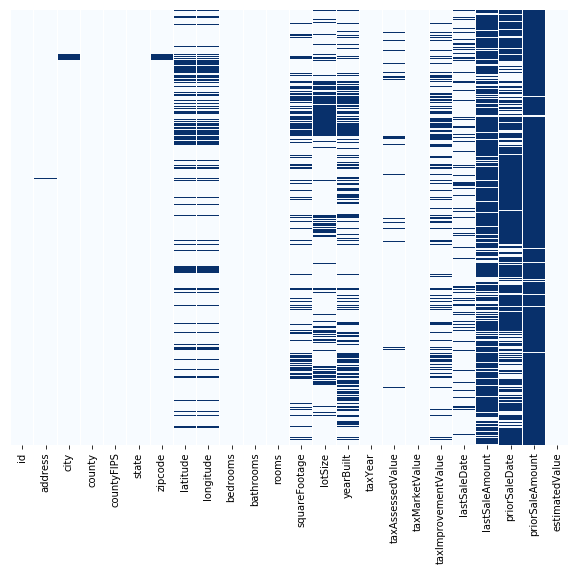

In [14]:
plt.figure(figsize = (10, 8))
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

In [15]:
henderson = data.county == 'Henderson'

In [16]:
data[henderson].head()

,id,address,city,county,countyFIPS,state,zipcode,latitude,longitude,bedrooms,...,yearBuilt,taxYear,taxAssessedValue,taxMarketValue,taxImprovementValue,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimatedValue
65,167662497,13525 TWIN CREEK LN,MABANK,Henderson,48213,TX,75147.0,32.343720,-96.077490,0,...,1988.0,2018,167750.0,167750.0,160770.0,1989-09-01,NaN,NaN,NaN,213168
137,231326505,216 W ANDREW DR,MABANK,Henderson,48213,TX,75147.0,32.356420,-96.108130,0,...,NaN,2018,69190.0,69190.0,62190.0,2018-02-19,NaN,2003-05-13,NaN,119860
190,167667160,310 W MCAFEE DR,MABANK,Henderson,48213,TX,75147.0,32.355610,-96.110180,0,...,NaN,2018,144700.0,144700.0,137700.0,2015-09-11,NaN,2015-06-11,NaN,187000
208,164989679,213 W ALENE DR,MABANK,Henderson,48213,TX,75147.0,32.356760,-96.107770,0,...,1975.0,2018,64080.0,64080.0,57080.0,2014-01-17,NaN,2009-12-10,NaN,115289
356,231332421,15382 COUNTY ROAD 4014,MABANK,Henderson,48213,TX,75147.0,32.446715,-96.079705,0,...,NaN,2018,2000.0,2000.0,NaN,2004-11-09,NaN,NaN,NaN,65000


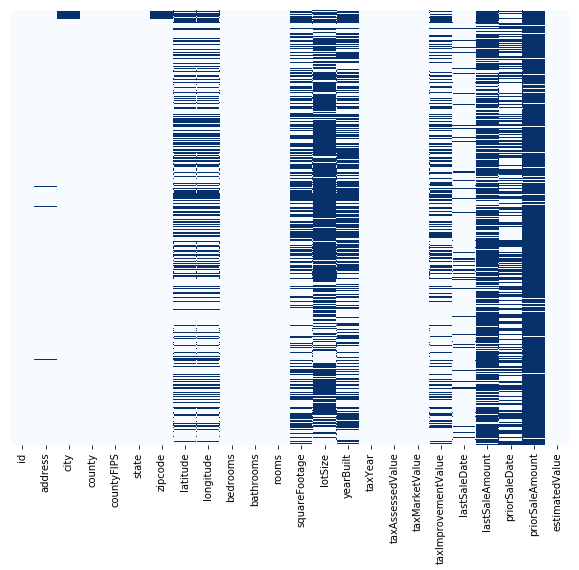

In [17]:
# Lets see what is happening with the missing values with our Henderson county

plt.figure(figsize = (10, 8))
sns.heatmap(data[henderson].isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

In [18]:
data[henderson].county.value_counts()
# looks like in our training set we only have less records -- did the end up in the training set? I guess so
#let's check the math

Henderson    53920
Name: county, dtype: int64

In [19]:
len(data[henderson])

53920

In [20]:
missing_henderson = 7409 - len(data[henderson])
print('Total discrepancy on No of observations for Henderson County is: ', missing_henderson)

Total discrepancy on No of observations for Henderson County is:  -46511


In [21]:
a = 7409 - 53920
a

-46511

My observations: 
* Why do I see different countyFIPS in data for Henderson county? This could be the reason as the model would treat these values differently. 

In [22]:
48213

48213

In [23]:
data[henderson].county.value_counts()

Henderson    53920
Name: county, dtype: int64

In [24]:
data[henderson].countyFIPS.value_counts()

48213    53920
Name: countyFIPS, dtype: int64

In [25]:
data.columns

Index(['id', 'address', 'city', 'county', 'countyFIPS', 'state', 'zipcode',
       'latitude', 'longitude', 'bedrooms', 'bathrooms', 'rooms',
       'squareFootage', 'lotSize', 'yearBuilt', 'taxYear', 'taxAssessedValue',
       'taxMarketValue', 'taxImprovementValue', 'lastSaleDate',
       'lastSaleAmount', 'priorSaleDate', 'priorSaleAmount', 'estimatedValue'],
      dtype='object')

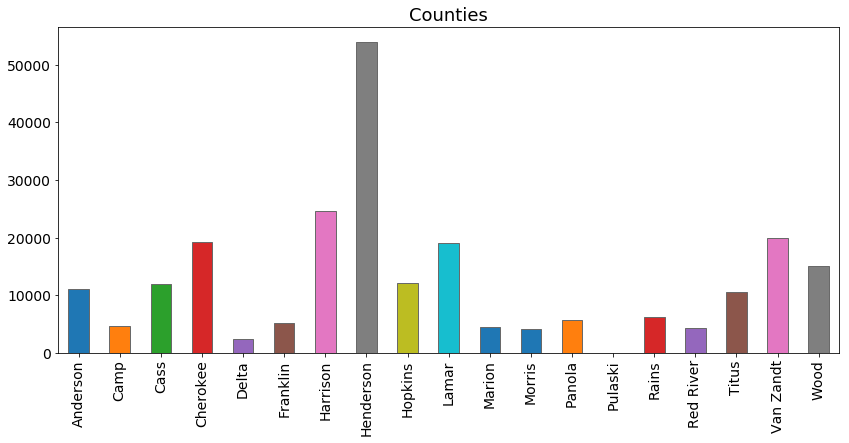

In [26]:
plt.title('Counties', fontsize = 18)

plt.grid(c = 'lemonchiffon', linestyle = '--')
ax = data['county'].value_counts().sort_index().plot.bar(
    figsize = (14,6),
    fontsize = 14, edgecolor='dimgrey')

### Ok, so Henderson is the most represented county in our dataset. Let's see how was it possible that different county FIPS ended up under the same county name. 

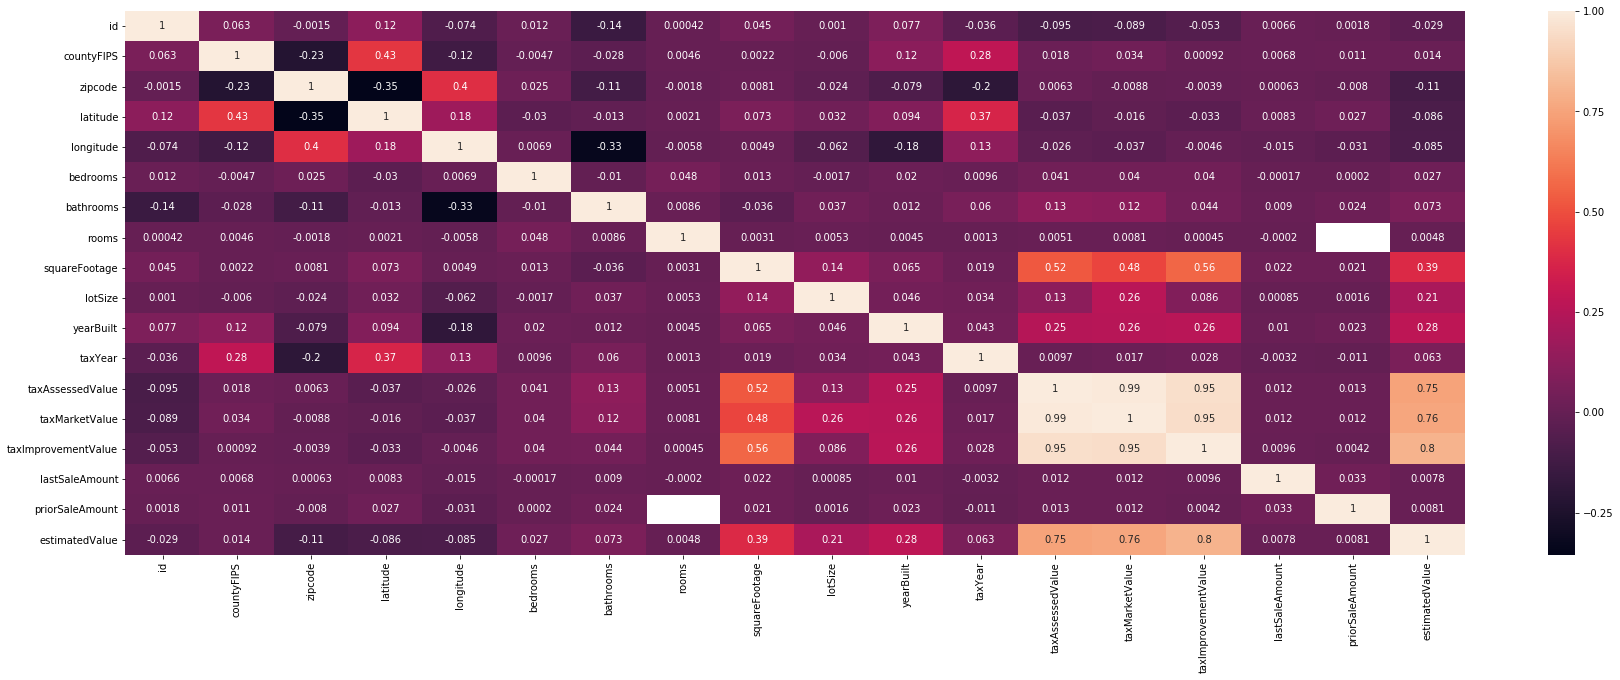

In [27]:
plt.figure(figsize = (30, 10))
sns.heatmap(data.corr(), annot = True)

In [28]:
data.columns

Index(['id', 'address', 'city', 'county', 'countyFIPS', 'state', 'zipcode',
       'latitude', 'longitude', 'bedrooms', 'bathrooms', 'rooms',
       'squareFootage', 'lotSize', 'yearBuilt', 'taxYear', 'taxAssessedValue',
       'taxMarketValue', 'taxImprovementValue', 'lastSaleDate',
       'lastSaleAmount', 'priorSaleDate', 'priorSaleAmount', 'estimatedValue'],
      dtype='object')

From this correlation matrix we can see the best predictors for our model and the highest correlated features with our target: 
* 'taxAssessedValue',  ---> NO MISSING VALUES
* 'taxMarketValue',  -----> No Missing Values
* 'taxImprovementValue'  ----> many missing values --> 22% Missing Values and this is our highest predictor. To impove the model we need to get more data here. 
* Sq Footage ---> Many missing values

No I want to see how are we doing in terms of missing values for these features for Henderson County

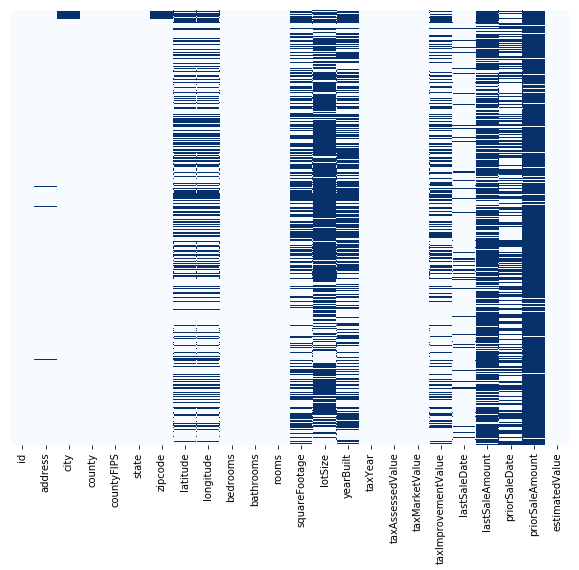

In [29]:
plt.figure(figsize = (10, 8))
sns.heatmap(data[henderson].isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

In [30]:
missing_values = (sum(data['taxImprovementValue'].isnull())/234216)*100
print('Missing Values percentage for taxImprovementValue is: '), missing_values

Missing Values percentage for taxImprovementValue is: 


(None, 21.595877309833657)

(0, 400000)

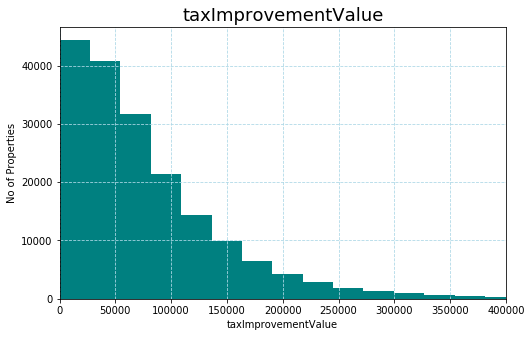

In [31]:
plt.title('taxImprovementValue', fontsize = 18)

plt.xlabel('taxImprovementValue')
plt.ylabel('No of Properties')
data['taxImprovementValue'].hist(bins = 250, figsize = (8,5), color = 'teal')
plt.grid(c = 'lightblue', linestyle = '--')
plt.xlim((0, 400000))

(0, 700000)

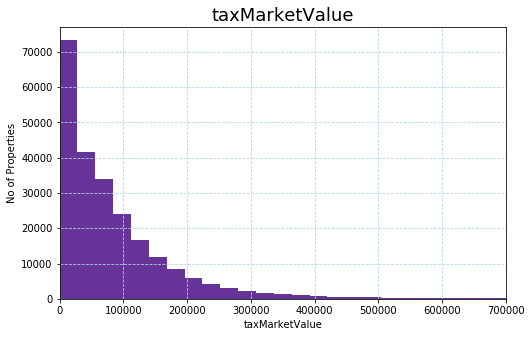

In [32]:
plt.title('taxMarketValue', fontsize = 18)

plt.xlabel('taxMarketValue')
plt.ylabel('No of Properties')
data['taxMarketValue'].hist(bins = 250, figsize = (8,5), color = 'rebeccapurple')
plt.grid(c = 'lightblue', linestyle = '--')
plt.xlim((0, 700000))

In [33]:
data['taxMarketValue'].max()

7002000.0

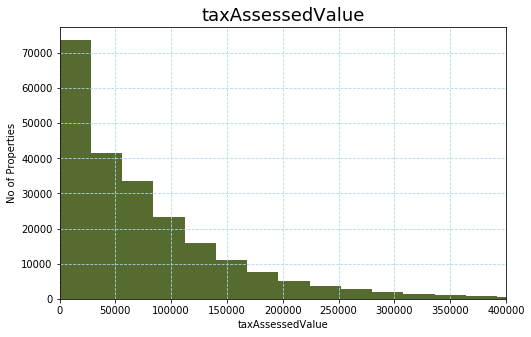

In [34]:
plt.title('taxAssessedValue', fontsize = 18)

plt.xlabel('taxAssessedValue')
plt.ylabel('No of Properties')
data['taxAssessedValue'].hist(bins = 250, figsize = (8,5), color = 'darkolivegreen')

plt.xlim((0, 400000))
plt.grid(c = 'lightblue', linestyle = '--')

In [35]:
### Maybe these two columns are related themselves -- > how do you check on correlation here? 

They select only the features that would contribute most to the quality of the resulting model. This process is called “Feature Selection”.
Let's use Pearson correlation to summarize the strength of the linear relationship between two features.

Let's use Pearson correlation to summarize the strength of the linear relationship between two features.

### multicollinearity ----> we have two predictors that are correlated between each other which causes some 

In [40]:
from numpy import cov
covariance = cov(X, Y)
print(covariance)

[[1.28813489e+10 1.14909812e+10]
 [1.14909812e+10 1.18618534e+10]]


In [39]:
sum(X.isnull()), sum(Y.isnull()), len(X), len(Y)

(0, 0, 234216, 234216)

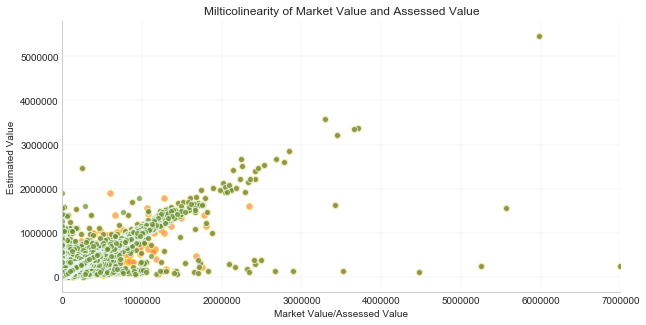

In [38]:
data.taxMarketValue = data.taxMarketValue.fillna(-1)
data.taxAssessedValue = data.taxAssessedValue.fillna(-1)


plt.style.use('seaborn-whitegrid')

X = data.taxMarketValue
Y = data.taxAssessedValue


fig, ax = plt.subplots(figsize=(10, 5))


#assigns a color to each data point
ax.scatter(X, data.estimatedValue, alpha=0.70, color='salmon', edgecolors='gold')
ax.scatter(Y, data.estimatedValue, alpha = 0.7, color = 'olivedrab', edgecolors='azure')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(color='grey', linestyle='-', linewidth=0.15, alpha=0.5)
ax.set_title('Milticolinearity of Market Value and Assessed Value')
ax.set_xlabel('Market Value/Assessed Value')
ax.set_ylabel('Estimated Value')
ax.set_xlim(0,7000000)

plt.show()




In [41]:
from scipy.stats import pearsonr
pearson, _ = pearsonr(X, Y)
print('Pearson Correlation coef between Market Value/ Assessed Value is: '), pearson

Pearson Correlation coef between Market Value/ Assessed Value is: 


(None, 0.9296086692653657)

Correlated features in general don't improve models (although it depends on the specifics of the problem like the number of variables and the degree of correlation), but they affect specific models in different ways and to varying extents:

* For linear models (e.g., linear regression or logistic regression), multicolinearity can yield solutions that are wildly varying and possibly numerically unstable.

* Random forests can be good at detecting interactions between different features, but highly correlated features can mask these interactions.

* More generally, this can be viewed as a special case of Occam's razor. A simpler model is preferable, and, in some sense, a model with fewer features is simpler. The concept of minimum description length makes this more precise.


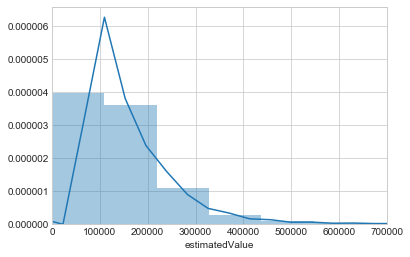

In [42]:
sns.distplot(data.estimatedValue,kde = True)
plt.xlim(0, 700000)
plt.show()

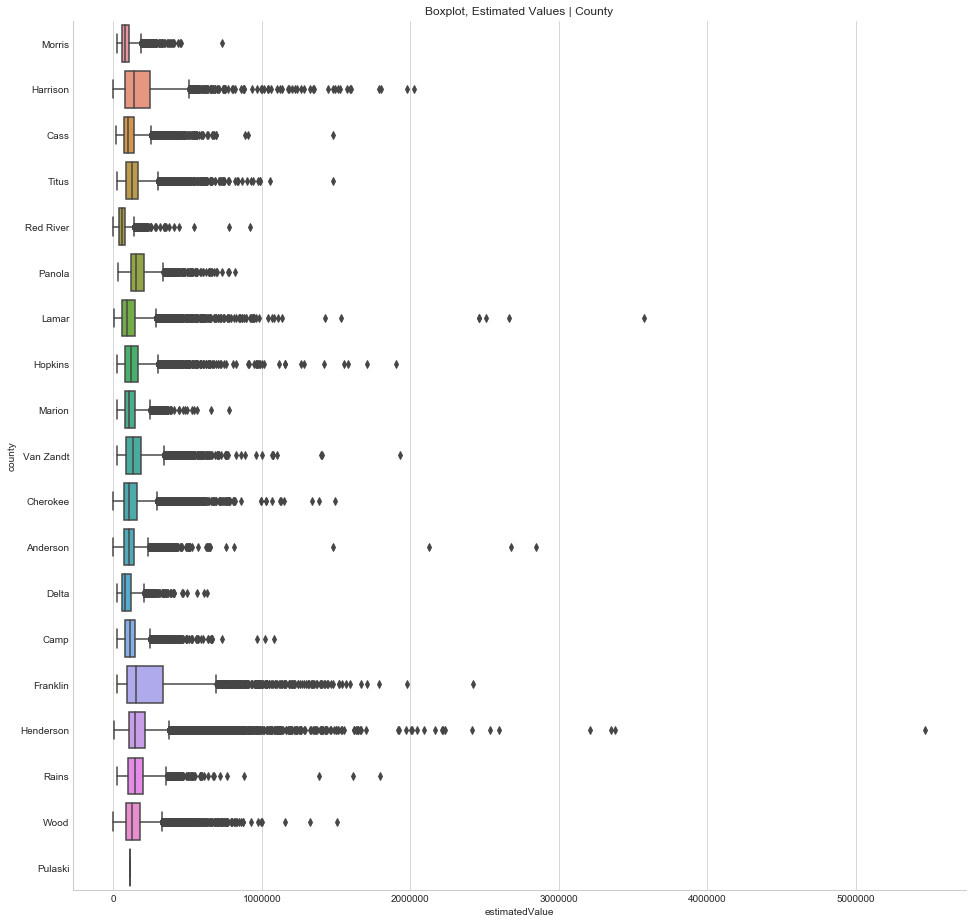

In [43]:
fig, ax = plt.subplots(figsize=[16, 16])
sns.boxplot(
    data=data,
    y=data.county,
    x=data.estimatedValue
)
ax.set_title('Boxplot, Estimated Values | County')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [44]:
mean_y = data.estimatedValue.mean()



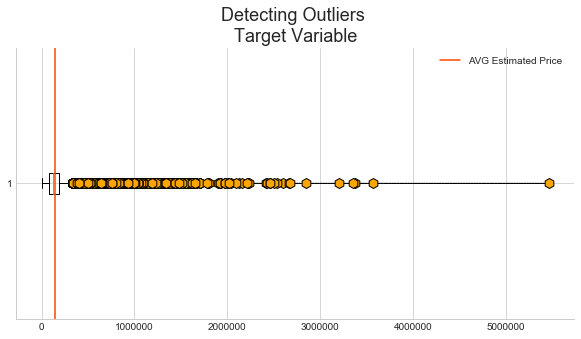

In [45]:
fig, ax1 = plt.subplots(figsize=[10, 5])

ax1.set_title('Boxplot, Estimated Values | County')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)


flierprops = dict(marker='h', markerfacecolor='orange', markersize=10,
                  linestyle='--')
ax1.set_title('Detecting Outliers \n Target Variable ', fontsize = 18)
ax1.boxplot(data.estimatedValue, vert=False, flierprops=flierprops, meanline = True)
ax1.axvline(x = mean_y, c = 'orangered', label = 'AVG Estimated Price ')
plt.ylim(0, 2)
plt.legend(loc='upper right')
plt.show()

(0, 1000000)

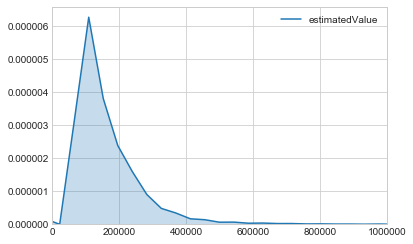

In [46]:
ax = sns.kdeplot(data.estimatedValue,
                  shade=True,shade_lowest=False)
plt.xlim(0, 1000000)

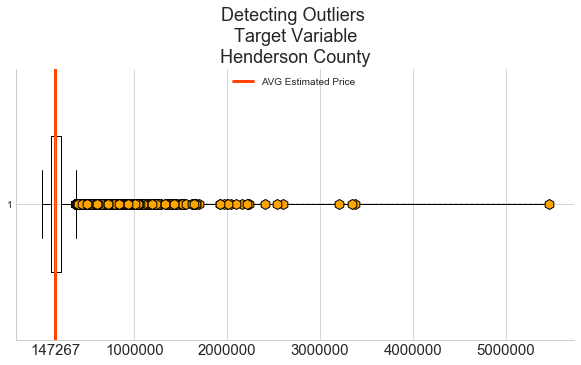

In [52]:
fig, ax1 = plt.subplots(figsize=[10, 5])

ax1.set_title('Boxplot, Estimated Values | County')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)


flierprops = dict(marker='h', markerfacecolor='orange', markersize=10,
                  linestyle='--')
ax1.set_title('Detecting Outliers \n Target Variable \n Henderson County ', fontsize = 18)
ax1.boxplot(hdata.estimatedValue, vert=False, flierprops=flierprops, meanline = True, widths=(1))
ax1.axvline(x = mean_y, c = 'orangered', label = 'AVG Estimated Price ', linewidth = 3.0)
plt.ylim(0, 2)
plt.legend(loc='upper center')
plt.xticks(( mean_y, 1000000, 2000000, 3000000, 4000000, 5000000), fontsize = 15, rotation = 0)

plt.show()

In [ ]:
ax = sns.swarmplot(x=hdata.estimatedValue, y = hdata.city, data=data, color="grey")

### Ideas for impeovement: Add more features Luxury/not, neiborhood? 
* outlier or an honest-to-goodness data point your model should account for
* remove outliers/ we can do log transformation of the target as well. 

### Lets Model

In [48]:
mdata = pd.read_csv('home_values_texas.csv')


In [49]:
mdata.columns

Index(['id', 'address', 'city', 'county', 'countyFIPS', 'state', 'zipcode',
       'latitude', 'longitude', 'bedrooms', 'bathrooms', 'rooms',
       'squareFootage', 'lotSize', 'yearBuilt', 'taxYear', 'taxAssessedValue',
       'taxMarketValue', 'taxImprovementValue', 'lastSaleDate',
       'lastSaleAmount', 'priorSaleDate', 'priorSaleAmount', 'estimatedValue'],
      dtype='object')

In [50]:
#Lets only model for henderson county
hdata = mdata[henderson]

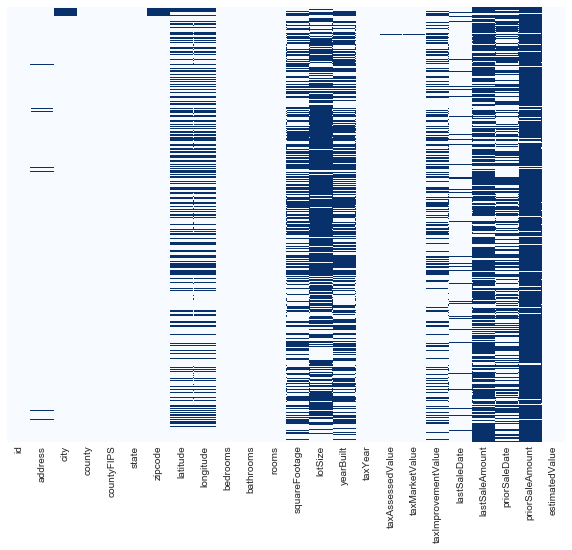

In [80]:
plt.figure(figsize = (10, 8))
sns.heatmap(hdata.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

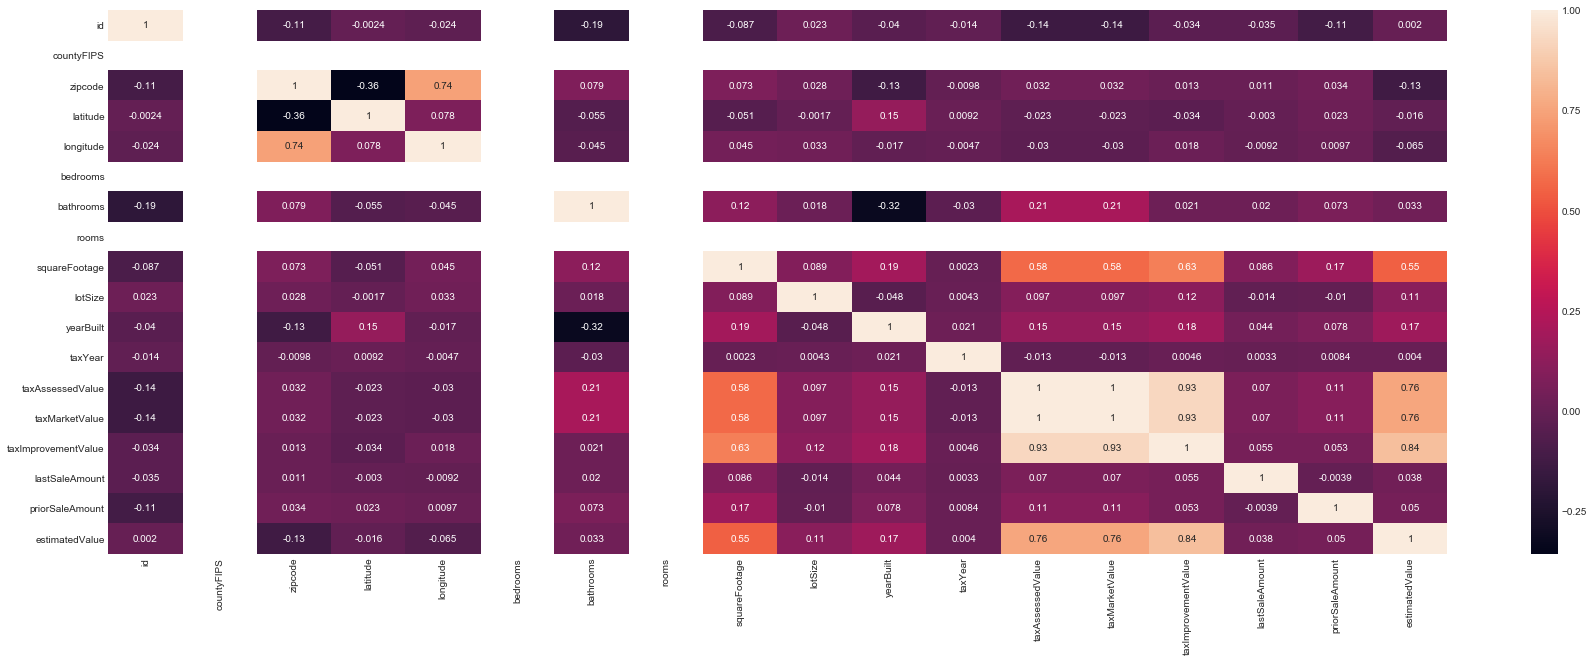

In [81]:
plt.figure(figsize = (30, 10))
sns.heatmap(hdata.corr(), annot = True)

In [82]:
# what is going on with our bedrooms and rooms situation in data? Missing values? 

In [87]:
hdata.bedrooms.value_counts() # we are missing data for 'bedrooms' in henderson county


0    53920
Name: bedrooms, dtype: int64

In [88]:
hdata.rooms.value_counts() # we are missing data for 'rooms' in henderson county

0    53920
Name: rooms, dtype: int64

In [85]:
hdata.describe()

,id,countyFIPS,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,taxYear,taxAssessedValue,taxMarketValue,taxImprovementValue,lastSaleAmount,priorSaleAmount,estimatedValue
count,5.392000e+04,53920.0,52895.000000,33753.000000,33753.000000,53920.0,53920.000000,53920.0,28233.000000,1.460400e+04,23705.000000,53920.000000,5.384200e+04,5.384200e+04,3.460300e+04,12058.000000,2727.000000,5.392000e+04
mean,2.028456e+08,48213.0,75385.662369,32.245382,-95.913811,0.0,1.188807,0.0,1442.006021,3.825728e+05,1980.770892,2017.995215,8.058975e+04,8.058975e+04,9.083104e+04,3804.653840,12384.719839,1.791283e+05
std,5.941757e+07,0.0,295.422225,0.094583,0.286112,0.0,2.179751,0.0,700.636986,1.767649e+06,17.191155,0.102706,1.401941e+05,1.401941e+05,1.128622e+05,25175.840323,39009.188896,1.325494e+05
min,2.535440e+05,48213.0,75103.000000,30.656230,-97.298392,0.0,0.000000,0.0,100.000000,1.310000e+02,1890.000000,2015.000000,5.000000e+01,5.000000e+01,2.000000e+01,0.000000,0.000000,3.000000e+03
25%,1.676680e+08,48213.0,75156.000000,32.196610,-96.117120,0.0,0.000000,0.0,984.000000,2.517800e+04,1971.000000,2018.000000,2.500000e+03,2.500000e+03,2.587000e+04,0.000000,0.000000,1.040000e+05
50%,2.313028e+08,48213.0,75156.000000,32.248103,-96.008230,0.0,0.000000,0.0,1332.000000,6.669000e+04,1982.000000,2018.000000,3.195000e+04,3.195000e+04,5.943000e+04,0.000000,0.000000,1.450000e+05
75%,2.313244e+08,48213.0,75752.000000,32.302631,-95.750474,0.0,1.500000,0.0,1750.000000,2.178000e+05,1995.000000,2018.000000,1.035000e+05,1.035000e+05,1.194300e+05,0.000000,0.000000,2.120000e+05
max,3.259452e+08,48213.0,76567.000000,40.714772,-74.004371,0.0,13.000000,0.0,13796.000000,1.047380e+08,2018.000000,2018.000000,5.983940e+06,5.983940e+06,2.932500e+06,925000.000000,524885.000000,5.466093e+06


In [91]:
hdata.countyFIPS.value_counts()  # all values for county are 48213 

48213    53920
Name: countyFIPS, dtype: int64

In [92]:
hdata.city.value_counts()

MABANK             13028
ATHENS              9022
CHANDLER            5746
GUN BARREL CITY     4549
MALAKOFF            3481
KEMP                2826
TOOL                2664
TRINIDAD            2552
EUSTACE             2365
FRANKSTON           2301
BROWNSBORO          1393
LARUE               1171
MURCHISON            835
ENCHANTED OAKS       391
SEVEN POINTS         356
LOG CABIN            193
POYNOR                 7
PALESTINE              7
COFFEE CITY            2
DALLAS                 2
LUFKIN                 1
ROCKDALE               1
BULLARD                1
RULE                   1
JACKSONVILLE           1
CORSICANA              1
GUN BARREL CY          1
CANTON                 1
Name: city, dtype: int64

Text(0, 0.5, '$ AVG Estimated Cost')

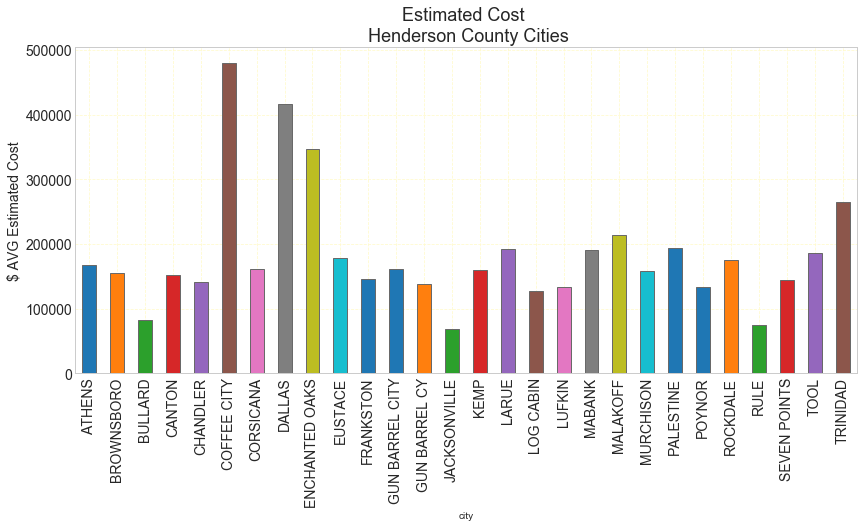

In [113]:
plt.title('Estimated Cost \n Henderson County Cities', fontsize = 18)

plt.grid(c = 'lemonchiffon', linestyle = '--')
ax = hdata.groupby('city').mean()['estimatedValue'].sort_index().plot.bar(
    figsize = (14,6),
    fontsize = 14, edgecolor='dimgrey')

plt.ylabel('$ AVG Estimated Cost', fontsize = 14)

In [94]:
hdata.groupby('city').mean()['estimatedValue']

city
ATHENS             167300.415761
BROWNSBORO         156046.280689
BULLARD             82000.000000
CANTON             152000.000000
CHANDLER           141325.564393
COFFEE CITY        480500.000000
CORSICANA          161234.000000
DALLAS             417088.000000
ENCHANTED OAKS     346525.936061
EUSTACE            178108.745032
FRANKSTON          146142.619296
GUN BARREL CITY    162077.810288
GUN BARREL CY      138285.000000
JACKSONVILLE        68121.000000
KEMP               159544.152159
LARUE              192863.374039
LOG CABIN          127937.082902
LUFKIN             133888.000000
MABANK             190222.709549
MALAKOFF           214825.796897
MURCHISON          158583.914970
PALESTINE          194245.857143
POYNOR             133989.571429
ROCKDALE           175000.000000
RULE                74393.000000
SEVEN POINTS       144306.567416
TOOL               186219.242492
TRINIDAD           264751.093260
Name: estimatedValue, dtype: float64

In [100]:
coffee = hdata.city == 'COFFEE CITY'

In [102]:
hdata[coffee].estimatedValue.value_counts()

390000    1
571000    1
Name: estimatedValue, dtype: int64

In [104]:
dallas = hdata.city == 'DALLAS'

In [108]:
len(hdata[dallas]) 
# only 2 data points for dallas, perhaps luzury cities need to be treated as a separate category here

2